# clustering_methods

In [1]:
import numpy as np
from sklearn import mixture
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt

In [2]:
# 정규분포 랜덤값 생성
np.random.seed(4711)
c1 = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
# 평균이 10,0 공분산이 3,1 / 1,4 2차원 다변량 정규분포
l1 = np.zeros(100)
l2 = np.ones(100)
c2 = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[100,])
print(c1.shape)
print(c1)

(100, 2)
[[  9.21188389  -0.15188589]
 [  8.88937431  -0.33937464]
 [ 10.76840064   2.95244645]
 [  8.24213268   1.29094802]
 [  5.7967009   -5.83776714]
 [  6.3499309    0.63959515]
 [  8.1057123   -0.45887277]
 [  8.72084884  -4.40444487]
 [  8.83500513  -0.3916611 ]
 [ 10.4006121    2.71240817]
 [ 11.95503402   1.98602715]
 [  8.5014185    0.50349583]
 [  9.2335919    1.30693205]
 [ 12.27768001   1.62763958]
 [ 10.95901841  -0.12752032]
 [  8.72437412  -0.73101911]
 [  9.64949127   3.4198941 ]
 [ 11.49912084  -0.55113172]
 [ 11.48256428  -0.28623494]
 [  8.58740424   1.66814229]
 [ 11.95570427  -1.27350693]
 [  9.85622312   1.08989137]
 [ 10.11831014   1.08458295]
 [  7.76042253   0.63746835]
 [ 10.99794159  -2.93746848]
 [  6.90850201  -1.44867941]
 [  7.85787065  -0.99148119]
 [  6.12508463  -2.44306477]
 [ 10.61143795  -0.23622769]
 [ 11.09217492  -1.69984051]
 [  7.15906941  -0.12267486]
 [ 10.73784011  -1.63560624]
 [  8.23931855   1.55744279]
 [  9.83913054  -0.48729797]
 [ 11

In [3]:
# 노이즈 만들기
np.random.seed(1)  # for repeatability 
noise1x = np.random.normal(0,2,100)
noise1y = np.random.normal(0,8,100)
noise2 = np.random.normal(0,8,100)
c1[:,0] += noise1x
c1[:,1] += noise1y
c2[:,1] += noise2

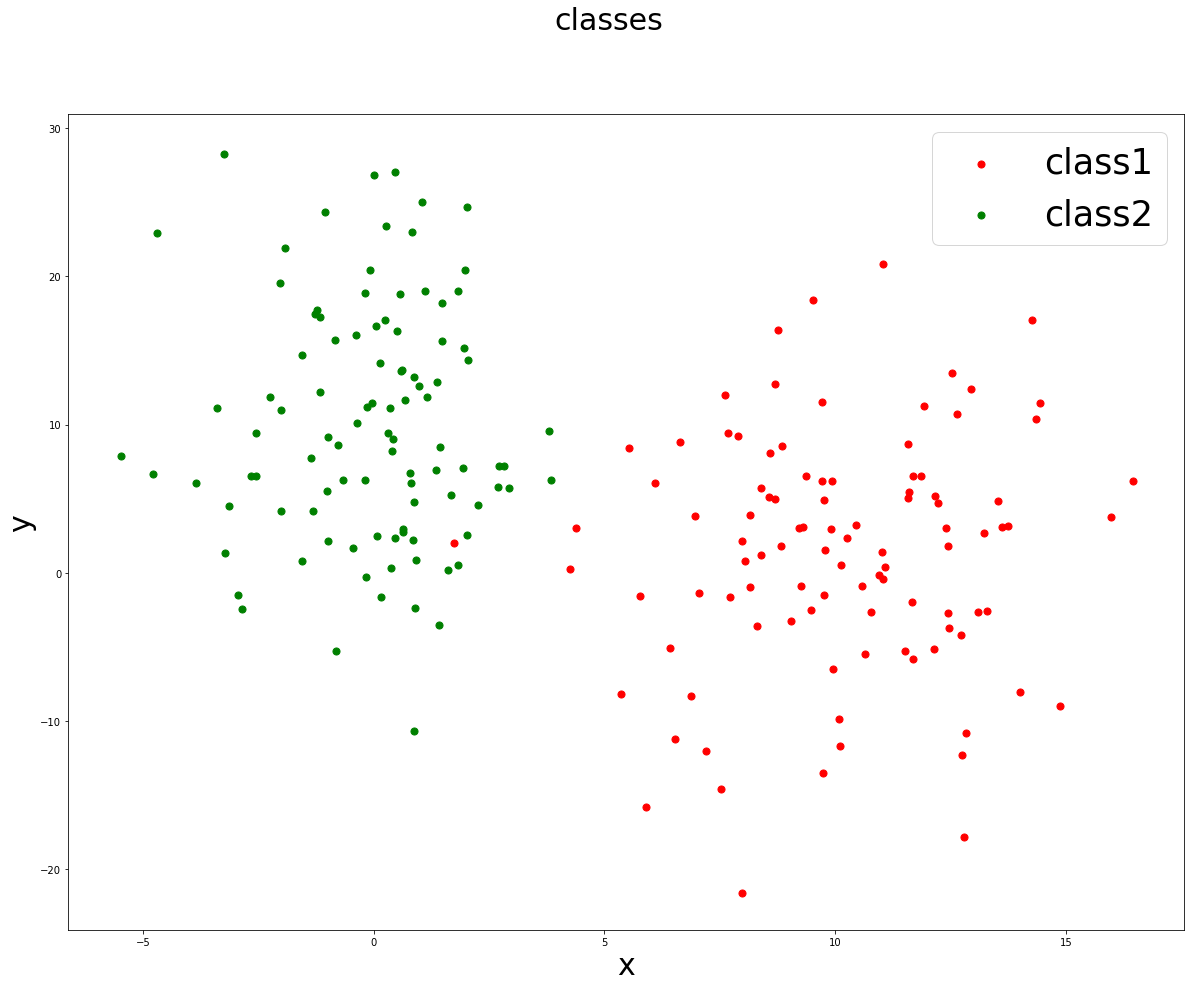

In [4]:
# 그래프 그리기
plt.clf()
#fig.clf()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)
fig.suptitle('classes',fontsize=30)
labels = np.concatenate((l1,l2),)
# concatenate : Join a sequence of arrays along an existing axis.
X = np.concatenate((c1, c2),) 
pp1= ax.scatter(c1[:,0], c1[:,1],cmap='prism',s=50,color='r')
pp2= ax.scatter(c2[:,0], c2[:,1],cmap='prism',s=50,color='g')
ax.legend((pp1,pp2),('class1', 'class2'),fontsize=35)
plt.show()
fig.savefig('classes.png')
# 그래프 초기화
plt.clf()
fig.clf()

In [5]:
from sklearn import mixture
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 2:2 4칸 그래프 만들기 
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, sharex='col', sharey='row')

In [6]:
# K-means 
# 클러스터 개수 지정
kmeans = KMeans(n_clusters=2)
# fit 함수를 통해 훈련시킴
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
X[:5]

array([[ 12.46057462,  -3.72891441],
       [  7.66586148,   9.456687  ],
       [  9.71205714,   6.18037959],
       [  6.09619544,   6.03957621],
       [  7.52751616, -14.59706191]])

In [8]:
pred_kmeans = kmeans.labels_
print(pred_kmeans)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]


In [9]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='prism')  # plot points with cluster dependent colors
axis1.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='prism')
axis1.set_ylabel('y',fontsize=40)
axis1.set_title('k-means',fontsize=20)

In [10]:
#mean-shift
# 대역폭 지정 
ms = MeanShift(bandwidth=7)
ms.fit(X)
# 군집 label 속성을 이용하여 접근 
pred_ms = ms.labels_
axis2.scatter(X[:,0], X[:,1], c=pred_ms, cmap='prism')
axis2.set_title('mean-shift',fontsize=20)

In [11]:
#gaussian mixture
g = mixture.GaussianMixture(n_components=2)# 변경됨
g.fit(X) 
# 군집 predict 속성을 이용하여 접근 
pred_gmm = g.predict(X)
axis3.scatter(X[:,0], X[:,1], c=pred_gmm, cmap='prism')
axis3.set_xlabel('x',fontsize=40)
axis3.set_ylabel('y',fontsize=40)
axis3.set_title('gaussian mixture',fontsize=20)

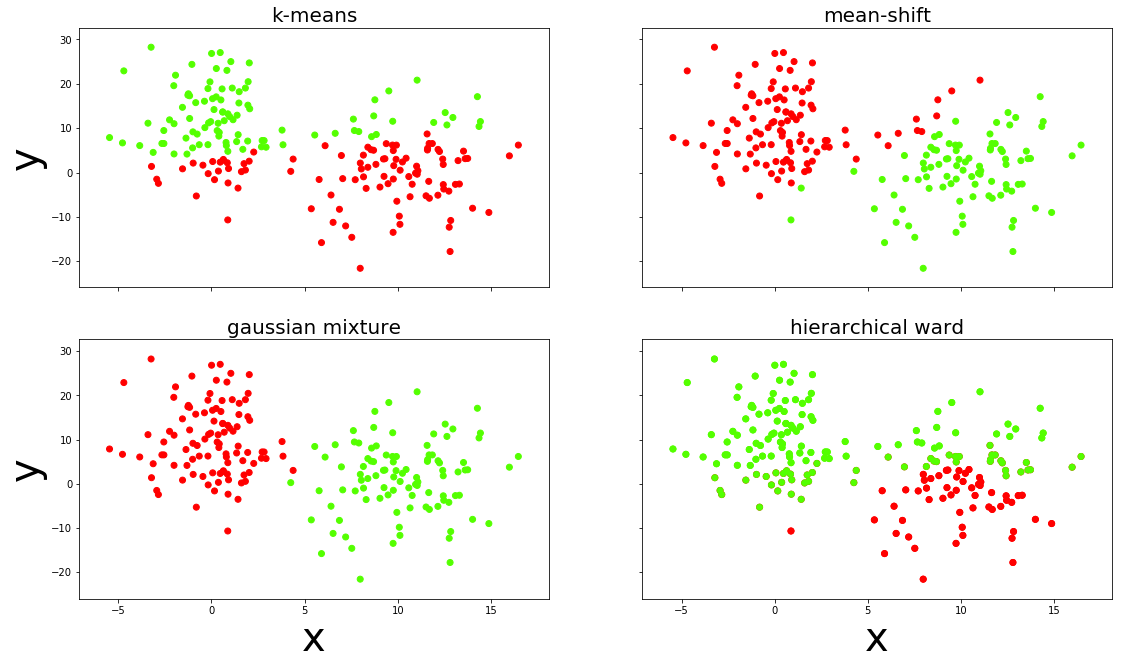

In [12]:
# hierachical 게층 알고리즘
# fit() 함수와 동일 (훈련 시킴)
Z=linkage(X,'ward') # variance minimization algorithm
max_d=110
pred_h=fcluster(Z, max_d, criterion='distance')
axis4.scatter(X[:,0], X[:,1], c=pred_h, cmap='prism')
axis4.set_xlabel('x',fontsize=40)
axis4.set_title('hierarchical ward',fontsize=20)
fig.set_size_inches(18.5,10.5)
plt.show()
fig.savefig('comp_clustering.png', dpi=100)

In [13]:
fig.clf()#reset plt

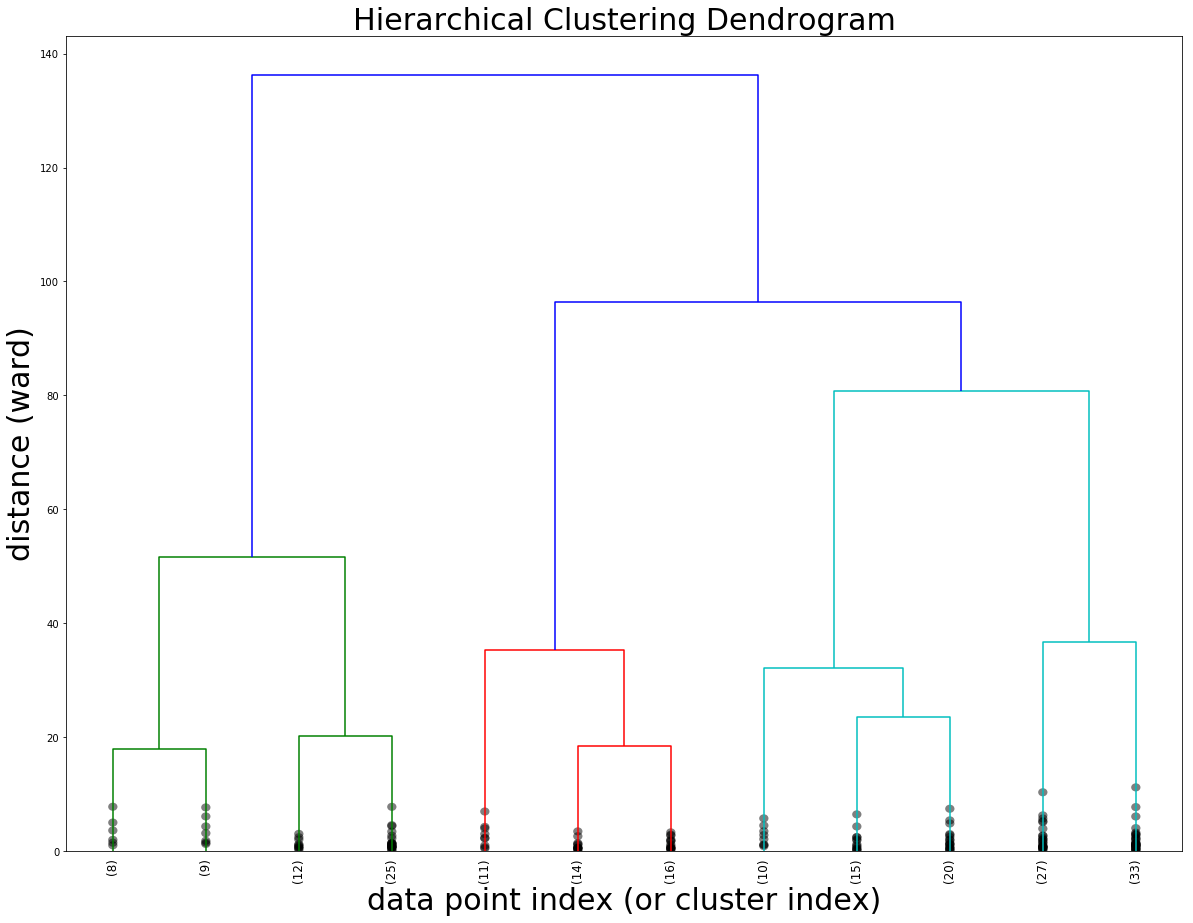

In [14]:
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize=(20,15))
plt.title('Hierarchical Clustering Dendrogram',fontsize=30)
plt.xlabel('data point index (or cluster index)',fontsize=30)
plt.ylabel('distance (ward)',fontsize=30)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()
fig.savefig('dendrogram.png')

In [15]:
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
res = homogeneity_completeness_v_measure(labels,pred_kmeans)
print('kmeans measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_kmeans))
res = homogeneity_completeness_v_measure(labels,pred_ms)
print('mean-shift measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_ms))
res = homogeneity_completeness_v_measure(labels,pred_gmm)
print('gaussian mixture model measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_gmm))
res = homogeneity_completeness_v_measure(labels,pred_h)
print('hierarchical (ward) measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_h)) 

kmeans measures, homogeneity: 0.25910415428  completeness: 0.259403626429  v-measure: 0.259253803872  silhouette score: 0.409469791511
mean-shift measures, homogeneity: 0.657373750073  completeness: 0.662158204648  v-measure: 0.65975730345  silhouette score: 0.40117810244
gaussian mixture model measures, homogeneity: 0.928991170482  completeness: 0.929259315921  v-measure: 0.929125223855  silhouette score: 0.379655885665
hierarchical (ward) measures, homogeneity: 0.302367273976  completeness: 0.359334499592  v-measure: 0.32839867574  silhouette score: 0.356446705251


가우시안 혼합 모델을 제외하고 다른 세 개의 알고리즘, k-평균과 계층 방식은 데이터의 일부를 오분류하고 있음<br>
v-measure, completeness, homogeneity, 분할 정확도 correctness 정량화 하는 방법을 제공<br>
가우시안 혼합 모델은 동실정, 완전성, v-척도 모두 가장 좋은 (1에 가까운) 값을 가짐.<br>
k-means와 계층 방식은 0.3 정도의 좋지 않음<br>
평균이동은 0.5 적당<br>
실루엣 점수는 모든 방식에서 0.35에서 0.41사이의 괜찮은 편

# PCA

In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

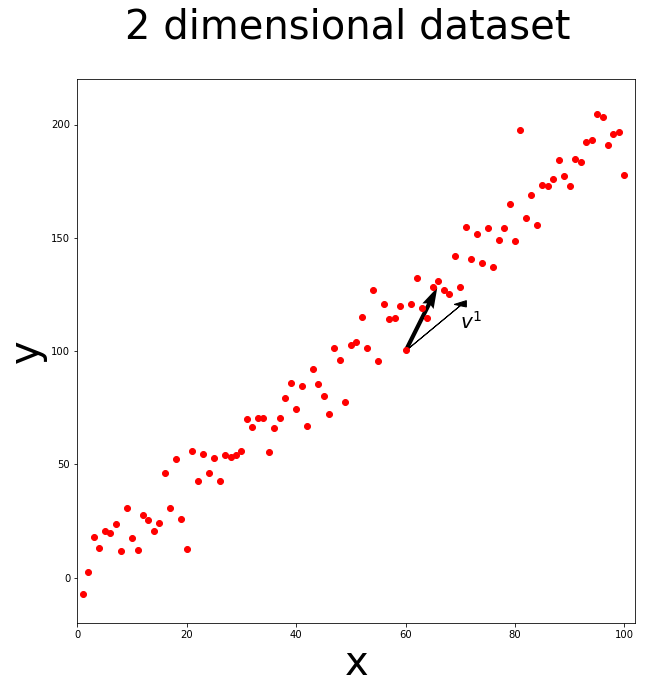

In [17]:
#line y = 2*x
x = np.arange(1,101,1).astype(float)
y = 2*np.arange(1,101,1).astype(float)
#노이즈 추가 하기
noise = np.random.normal(0, 10, 100)
y += noise

# 한 화면에 여러 개의 그래프를 그리기 위해
fig = plt.figure(figsize=(10, 10))

#plot 
plt.plot(x,y,'ro')
plt.axis([0,102, -20,220])
# 방향장 (화살표)
plt.quiver(60, 100, 10-0, 20-0, scale_units='xy', scale=1)
plt.arrow(60, 100,10-0, 20-0,head_width=2.5, head_length=2.5, fc='k', ec='k')
plt.text(70, 110, r'$v^1$', fontsize=20)

#save
ax = fig.add_subplot(111)
ax.axis([0,102, -20,220])
ax.set_xlabel('x',fontsize=40)
ax.set_ylabel('y',fontsize=40)
fig.suptitle('2 dimensional dataset',fontsize=40)
fig.savefig('pca_data.png')

결과 데이터 집합 <br>
데이터의 분포 방향, 데이터에서 추출하려고 했던 주성분 v1에 해당

In [18]:
#PCA
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_vector = np.array([[mean_x],[mean_y]])
print(mean_vector)
# 2차원 데이터 집합의 평균을 계산하고 평균만틈 이동
# 표준편차를 이용해 데이터 집합의 크기를 조정
u_x = (x- mean_x)/np.std(x)
u_y = (y-mean_y)/np.std(y)
sigma = np.cov([u_x,u_y])
print(sigma)
# Eigenvalues and vectors of a square matrix
# 주성분을 추출하기 위해 고윳값과 고유백터를 계산
# 가장 큰 고윳값과 연관된 고유 벡터를 서
eig_vals, eig_vecs = np.linalg.eig(sigma)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])
             for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
v1 = eig_pairs[0][1]
print(v1)

[[  50.5       ]
 [ 100.39713745]]
[[ 1.01010101  0.99599252]
 [ 0.99599252  1.01010101]]
[(2.0060935271947615, array([ 0.70710678,  0.70710678])), (0.014108493007259026, array([-0.70710678,  0.70710678]))]
[ 0.70710678  0.70710678]


In [19]:
#leading eigenvector:
# 주성분이 직선에 놓였는지 확인
# 좌표를 원래 크기로 돌림
x_v1 = v1[0]*np.std(x)+mean_x
y_v1 = v1[1]*np.std(y)+mean_y
# 기울기 2 시작할떄 선택한 기울기와 일치 
print('slope:',(y_v1)/(x_v1))

slope: 1.99729808351


In [20]:
# PCA 알고리즘 이용시 크기조정, 평균이동 없이 가능 

from sklearn.decomposition import PCA
# 크기가 조정된 데이터를 행렬 구조로 변환
# x,y 좌표를 갖는 데이터 포인트로 이뤄져있음
#X = np.array([x,y])
X = np.array([u_x,u_y])
X = X.T

# 주성분 개수를 지정 후 pca 실행 
pca = PCA(n_components=1)
pca.fit(X)
V = pca.components_
print(V,'-',V[0][1]/V[0][0]) 

#transform in reduced space
# 두 방법으로 데이터 집합은 새로운 1차원 공간으로 변환
X_red_sklearn = pca.fit_transform(X)
print(X_red_sklearn.shape)
W = np.array(v1.reshape(2,1))
X_red = W.T.dot(X.T)

#check the reduced matrices are equal
assert X_red.T.all() == X_red_sklearn.all(), 'problem with the pca algorithm'
# 같지 않으면 에러 발생시킴 
print(X_red.T[0],'-',X_red_sklearn[0])

[[-0.70710678 -0.70710678]] - 1.0
(100, 1)
[-2.52001734] - [ 2.52001734]
